#This is my CE888 Project 2 building a CNN for Image Classification on the FLAME Dataset.

In [55]:
#import libraries 
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input
from keras import models
from tensorflow.keras import Model
from keras import optimizers
from tensorflow.keras.applications import VGG16

In [56]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#unzip test file 
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Test.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [58]:
#unzip training file 
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Training.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [59]:
#set batch size, image size 
batch_size = 32
img_height = 255
img_width = 255
train_dir = '/content/Training'
test_dir = '/content/Test'



In [5]:
# #from file import test images 
# test_dir = '/content/Test'
# test = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

Found 8617 files belonging to 2 classes.


In [7]:
# #from file import training images 
# train_dir = '/content/Training'
# train = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size)

Found 39375 files belonging to 2 classes.


In [60]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='training')

val_gen = val_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                              subset='validation')

test = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode='binary')

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [11]:
# #Rescale images between 0-1 for model to aid learning 
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [17]:
# AUTOTUNE = tf.data.AUTOTUNE

# train = train.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Flatten()),
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9248)             

In [21]:
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=3
)

Epoch 1/3
985/985 [==============================] - 238s 208ms/step - loss: 0.2167 - accuracy: 0.9100 - val_loss: 0.1288 - val_accuracy: 0.9460
Epoch 2/3
985/985 [==============================] - 201s 204ms/step - loss: 0.0965 - accuracy: 0.9660 - val_loss: 0.1993 - val_accuracy: 0.9059
Epoch 3/3
985/985 [==============================] - 201s 204ms/step - loss: 0.0640 - accuracy: 0.9765 - val_loss: 0.4120 - val_accuracy: 0.8872


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model.ResNet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)


model.RenNet50.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['acc'])

102973440/102967424 [==============================] - 1s 0us/step


In [23]:
history = model.ResNet50.fit(
  train_gen,
  validation_data=val_gen,
  epochs=3
)

Epoch 1/3
985/985 [==============================] - 277s 275ms/step - loss: 0.2521 - acc: 0.9494 - val_loss: 3.2836 - val_acc: 0.3650
Epoch 2/3
985/985 [==============================] - 268s 272ms/step - loss: 0.0429 - acc: 0.9844 - val_loss: 0.7357 - val_acc: 0.7291
Epoch 3/3
985/985 [==============================] - 268s 272ms/step - loss: 0.0304 - acc: 0.9887 - val_loss: 0.7176 - val_acc: 0.9417


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
model.ResNet101V2 = tf.keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

model.ResNet101V2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['acc'])

In [31]:
history = model.ResNet101V2.fit(
  train_gen,
  validation_data=val_gen,
  epochs=3
)

Epoch 1/3
985/985 [==============================] - 324s 329ms/step - loss: 0.0437 - acc: 0.9851 - val_loss: 0.3643 - val_acc: 0.9032
Epoch 2/3
985/985 [==============================] - 323s 327ms/step - loss: 0.0389 - acc: 0.9861 - val_loss: 1.2991 - val_acc: 0.6618
Epoch 3/3
985/985 [==============================] - 323s 327ms/step - loss: 0.0288 - acc: 0.9901 - val_loss: 1.0699 - val_acc: 0.8000


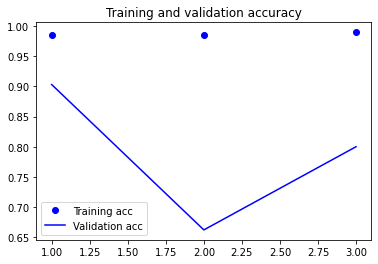

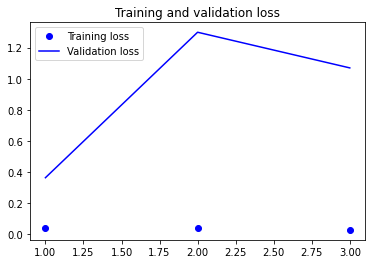

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
train_fire_dir = '/content/Training/Fire'
train_nofire_dir = '/content/Training/No_Fire'


In [79]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

x_train_nofire = train_datagen.flow_from_directory(train_nofire_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical'
                                                    )

y_train_fire = val_datagen.flow_from_directory(train_fire_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical'
                                                    )






Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [38]:
IMG_SIZE = 224
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     